<a href="https://colab.research.google.com/github/enelramon/TFM_PrediccionDelitos/blob/master/Sky_Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Train a linear regression model**

### 1. Cargamos las librerías necesarias

En primer lugar cargamos todas las librerías que vamos a utilizar. 

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Carga del dataset



In [10]:
source = 'http://www.sagrd.com/Descargas/Data/sky_rentals.csv'
df = pd.read_csv(source  )
df.head()
list(df.columns)

['Year',
 'Month',
 'Day',
 'RentalCount',
 'WeekDay',
 'Holiday',
 'Snow',
 'FHoliday',
 'FSnow',
 'FWeekDay']

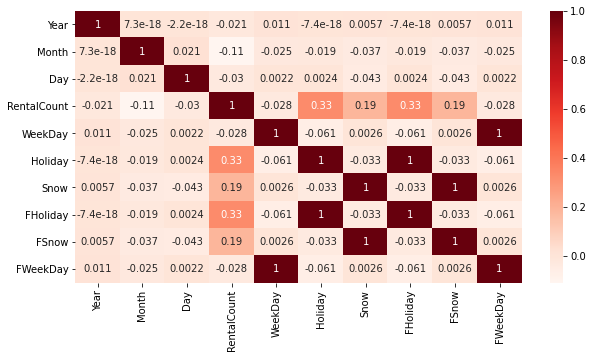

In [23]:
#Using Pearson Correlation
plt.figure(figsize=(10,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

###Separar las variables independientes de la variable a inferir

In [11]:
x = df[['Year', 'Month', 'Day',  'WeekDay', 'Holiday', 'Snow', 'FHoliday', 'FSnow', 'FWeekDay']]
y = df['RentalCount']

print("y")
print(y[0:5])
print("x")
print(x[0:5])

y
0    445
1     40
2    456
3     38
4     23
Name: RentalCount, dtype: int64
x
   Year  Month  Day  WeekDay  Holiday  Snow  FHoliday  FSnow  FWeekDay
0  2014      1   20        2        1     0         1      0         2
1  2014      2   13        5        0     0         0      0         5
2  2013      3   10        1        0     0         0      0         1
3  2014      3   31        2        0     0         0      0         2
4  2014      4   24        5        0     0         0      0         5


##Separar la data para entrenamiento y prueba

Una vez los datos están escalados podemos proceder a la partición. A continuación, dividimos el dataset en conjuntos de *train* y de *test*. En el *hold-out*, la proporción será un 70-30%. 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3) 

print("Original dataset size: {}".format(len(df)))
print("Train size: {}".format(len(X_train)))
print("Test size: {}".format(len(X_test)))

Original dataset size: 453
Train size: 317
Test size: 136


In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# evaluate the model
ypred = lm.predict(X_test)
print("Predictions:", ypred)

# Compute error between our test predictions and the actual values.
lin_mse = mean_squared_error(ypred, y_test)
print("Computed error:", lin_mse)

Predictions: [ 75.47620709 138.80122172  78.4793096  193.14619733 131.86324833
 236.30074909 231.90757012 116.28254089 141.25707088 226.37278041
 131.31599499 120.01078726 213.97306599 234.99961789 214.93399686
 194.32964928 195.05479314 140.70981754 228.17932375 129.40460981
  90.54118454 143.07672143  70.47556351  93.63323231 134.12252103
  82.41696984  99.18112923 184.38578402 222.61580005 117.5549381
  87.96486677 209.49094176 221.97960144 223.69441016 147.44116641
 150.33942708  71.65901546 138.57870064 119.06033295 207.47750411
 122.36179459 225.60300598 234.55720638 129.95186315 120.64698587
 229.35998634 127.81795689 235.22213897 114.34242172 129.49634443
 221.238561    78.05252486  86.05627095 236.81926845  69.8393649
 133.13564554  77.93205625 107.52212758 230.5147043  224.96680737
 516.70864477 131.95219359 226.14746996 136.03390621 169.98852853
 120.0079979  107.32834049 116.60448379 130.39427466 139.98467367
 239.58658395 235.02835188 146.70012597 120.6441965  132.5883922
